# Tutorial 1: Generating a virtual environment for the GenMR digital template


**Author:** Arnaud Mignan, Mignan Risk Analytics GmbH  
**Version:** 1.1.2  
**Last Updated:** 2026-01-27   
**License:** [AGPL-3](https://opensource.org/license/agpl-v3)   

The _digital template_, first described in [Mignan (2022)](https://www.mdpi.com/1660-4601/19/23/16097) and used in the CAT Risk Modelling Sandbox ([Mignan, 2024](https://github.com/amignan/Intro2CATriskModelling/blob/main/CATRiskModellingSandbox_tutorial.ipynb)), is a microcosm simulation of the complex Earth system for catastrophe dynamics R&D, multi-risk prototyping in the Generic Multi-Risk (GenMR) framework, and catastrophe risk eduction. It is defined as a virtual environment populated by loss-generating events that interact with each other and with the environment. The virtual environment, to be built in this tutorial, is composed of _environmental layers_ that consist of sets of variables $\theta(x,y)$ defined in a spatial grid of coordinates $(x,y)$. Each layer may be altered by _environmental objects_ located within the layer. The parsimonious complex Earth system finally consists of a stack of interacting environmental layers defined in the natural, technological and socio-economic systems. The loss-generating events that populate the virtual environment will be defined in the next tutorial, and their occurrence rates and interactions in a third and final tutorial.

Currently, a limited number of environmental layers and objects are available (Fig. 1, Table 1). This notebook provides a concise overview of these layers using a default parameterisation, with alternative scenarios to be introduced later in How-To Guides. The outputs generated here will serve as input for hazard and risk assessment in the subsequent tutorials.

![](../figures/digitaltemplate_env_rayshader.jpg)
<center><small><b>Fig. 1.</b> The GenMR digital template (here with default parameterisation) showing the topography and land use layers, with water in blue, built areas in grey, and the road network in white. A soil layer is also included but not displayed. Simulation rendered using <a href='https://www.rayshader.com/' target='_blank'>Rayshader</a> (Morgan-Wall, 2022).</small></center>

<br>
<center><small><b>Tab. 1.</b> List of available environmental layers <code>EnvLayer_ID</code> (Python classes).</small></center>

| Environment | ID | Layer | Variables | Properties (examples) | Object dependencies$^*$ | References | Status<sup>&#8225;</sup> |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| Natural | `topoLayer` | Topography | Elevation $z$ | Slope, aspect | Geological & hydrological objects | Mignan (2022) | <span style="color: green">&#x2713;<span> |
| Natural| `atmoLayer` | Atmosphere | Temperature $T$ | Tropopause, freezing level | - | in prep. | <span style="color: orange">ongoing<span> |
| Natural | `soilLayer` | Soil | Depth $h$ | Factor of safety | - | Mignan (2022) | <span style="color: green">&#x2713;<span> |
| Natural | `natLandLayer` | Natural land | State $S$ | - | - | Mignan (2024) | <span style="color: green">&#x2713;<span> |
| Technological | `urbLandLayer` | Urban land | State $S$ | Exposure value, year built | Road network | Mignan (2024) | <span style="color: green">&#x2713;<span> |
| Socio-economic |  |  |  |  |  |  | <span style="color: orange">&#x2717;</span> |

<small>* Each layer additionally depends on the previous ones.<br>
<sup>&#8225;</sup> Included in current version (<span style="color: green">&#x2713;</span>), planned for v.1.1.2 (<span style="color: orange">&#x2717;</span>).</small>

<br>
The environmental layers are generated as follows:

* **Topography**: Represented as elevation, $z$ (m), the generic topography is defined by a west-dipping slope and a fractal dimension between 2 and 3. Environmental objects associated with peril sources modify the topography through intrusion and extrusion rules. The overall process, illustrated in Figure 2, combines methods from solid geometry and morphometry. Further details can be found in [Mignan (2022)](https://www.mdpi.com/1660-4601/19/23/16097). The main properties of the topography layer include terrain slope ($^\circ$) and aspect ($^\circ$).

![](../figures/ref_Mignan_IJERPH2022_fig2.jpg)
<center><small><b>Fig. 2.</b> Construction of the topography layer following rules of solid geometry and morphometry, illustrating the combination of geometric primitives and terrain metrics. Redrawn from <a href='https://www.mdpi.com/1660-4601/19/23/16097' target='_blank'>Mignan (2022:fig.2)</a>.</small></center>


* **Atmosphere** (IN CONSTRUCTION): Characterised by the near-surface air temperature $T(z)$ function of the latitude and month of the year. Properties include the freezing level $z_{freeze}$ and the tropopause altitude $z_{tropopause}$. To add: water content...
* **Soil**: Characterised by the soil thickness, $h$ (m), which is initially spatially uniform. It can later vary through mass movement processes (using the landslide cellular automaton (CA) introduced in the next tutorial) or by a simpler rule applied here: $h = 0$ (i.e., scarp) if the soil is unstable at $(x,y)$. Other soil properties remain fixed parameters at this stage. A key property of the soil layer is the factor of safety, $F_S$, which indicates whether the soil is stable, critical, or unstable.
* **Natural land**: Defined by the state $S$, with $S=-1$ for water, $S=0$ for grassland, and $S=1$ for forest. These classes represent the pre-urbanised land cover. All grid locations $(x,y)$ are considered forested except those above an elevation-dependent tree line (grassland), or below sea level ($z = 0$) and along river channels (water).
* **Urban land**: Represents the built environment, where the state $S$ overwrites the natural land classification: $S = 2$ for housing, $S = 3$ for industrial, and $S = 4$ for commercial areas. The city is generated using a hybrid model that combines a simplified version of the SLEUTH city growth CA (Clarke et al., 1997; Candau, 2002), a road network CA (Koenig & Bauriedel, 2009), and a land-use transformation function (White et al., 1997) (Fig. 3; see [Mignan (2024)](https://www.cambridge.org/highereducation/books/introduction-to-catastrophe-risk-modelling/A3A5B5FB990921422BFEBB07734BF869#overview) for details). A key property of the urban-land layer is the asset value per pixel, which serves as the exposure component in the subsequent loss assessment tutorial.

![](../figures/digitaltemplate_layer_urban_SLEUTH.jpg)
<center><small><b>Fig. 3.</b> A simplified version of the Slope, Land use, Exclusion, Urban, Transportation, and Hill-shade (SLEUTH) model of urban growth (Clarke et al., 1997; Candau, 2002). Redrawn from <a href='https://www.cambridge.org/highereducation/books/introduction-to-catastrophe-risk-modelling/A3A5B5FB990921422BFEBB07734BF869#overview' target='_blank'>Mignan (2024:box3.3)</a>.</small></center>

Sections 1 and 2 detail the simulation of the virtual natural and technological environments, respectively (v1.1.1). A future Section 3, to be released in v1.1.2, will describe the socio-economic environment of the digital template.

In [1]:
## libraries ##
import numpy as np
import pandas as pd
import copy
from tqdm import tqdm    # loading bar display

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as MplPolygon

#import warnings 
#warnings.filterwarnings('ignore')   # commented, try to remove all warnings

from GenMR import environment as GenMR_env
from GenMR import perils as GenMR_perils
from GenMR import utils as GenMR_utils

GenMR_utils.init_io()  # make folders /io and /fig if do not exist

## 1. Natural environment generation

The generic natural environment is constrained by a predominant west–east orientation, with a coastline located at `x0`. This configuration ensures that any water mass, when present, is systematically positioned on the western side of the grid (Fig. 1). By convention, rivers flow exclusively from east to west. This directional constraint simplifies the natural environment generator while still allowing it to represent a wide range of regional configurations.

### 1.1. Grid definition

All environmental layers are defined on the raster grid `RasterGrid()`. The default grid parameterisation `gridPar` (a dictionary) specifies an active domain of 100 × 100 km, with a reference north-south coastline fixed at `x0 = 0` (i.e., $z(x_0) = 0$). A larger computational domain, bounded by (`xmin`, `xmax`, `ymin`, `ymax`), is included to account for potential boundary effects. The active box is thus defined as (`xmin+xbuffer`, `xmax-xbuffer`, `ymin+ybuffer`, `ymax-ybuffer`). The spatial resolution is determined by the pixel width `w=0.1` km. Lower-resolution grids may be defined later for specific environmental processes. In the current version, the parameter `lat_deg` specifies the latitude at $(x = 0, y = 0)$, which is used in weather- and climatic-peril modelling. A `lon_deg` parameter will be added in a future release when a longitude reference becomes necessary for additional environmental processes.

In [2]:
gridPar = {'w': .1,
           'xmin': -20, 'x0': 0, 'xmax': 120, 'ymin': -10, 'ymax': 110,
           'xbuffer': 20, 'ybuffer': 10,
           'lat_deg': 30}

grid = GenMR_env.RasterGrid(gridPar)

### 1.2. Natural peril definition (for environmental objects)

Environmental layers can be influenced by specific environmental objects; this is notably the case for the first layer to be generated, the topography. In the context of a generic and parsimonious model, only essential objects are implemented. Consequently, the environmental objects included are restricted to those associated with the perils to be modelled in later stages.

<br>
<center><small><b>Tab. 2.</b> Characteristics of peril sources that generate environmental objects affecting the topography.</small></center>

| Peril | ID | Source | Environmental object | References |
| :--- | :--- | :--- | :--- | :--- |
| Earthquake | `EQ` | Fault of coordinates (`x`,`y`), width `w_km`, dip `dig_deg`, top depth `z_km` | Tectonic hill | Mignan (2022) |
| Fluvial flood | `FF` | River modelled as damped sine (`riv_A_km`, `riv_lbd`, `riv_ome`, `riv_y0`), with discharge `Q_m3/s` and implicit upstream catchment area `A_km2` | River valley | Mignan (2022) |
| Volcanic eruption | `VE` | Volcano of coordinates (`x`,`y`) | Conic volcanic edifice | Mignan (2022) |

This configuration is parameterised using the dictionary `srcPar`. In this example, two faults, one river, and one volcano are defined. Additional perils will be introduced in the next tutorial. At this stage, only perils that can modify environmental layers are included.

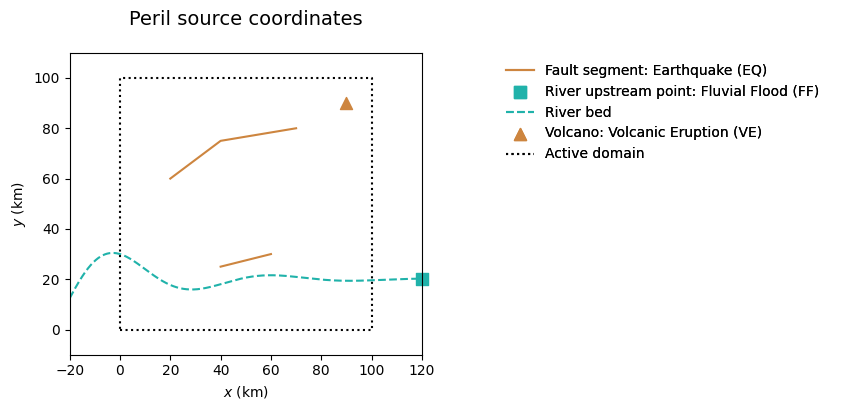

In [3]:
srcPar = {
    'perils': ['EQ', 'FF', 'VE'],
    'EQ': {'object': 'fault',
        'x': [[20, 40, 70], [40, 60]],                                        # 2 faults (2 segments, 1 segment)
        'y': [[60, 75, 80], [25, 30]],
        'w_km': [5, 5], 'dip_deg': [45, 45],
        'z_km': [2, 2], 'mec': ['R', 'R'],                                    # only reverse R mechanism for now
        'bin_km': 1},                                                         # fault spatial resolution
    'FF': {'object': 'river',
        'riv_A_km': [10], 'riv_lbd': [.03], 'riv_ome': [.1], 'riv_y0': [20],  # y = A*exp(-lbd*x)*cos(ome*x)+y0
        'Q_m3/s': [100e3], 'A_km2': 100*100},
    'VE': {'object': 'volcano', 'x': [90], 'y': [90]},
}

src = GenMR_perils.Src(srcPar, grid)

GenMR_perils.plot_src(src)

### 1.3. Generating the topography, atmosphere, soil, and natural land layers

Environmental layers are defined as instance of classes `EnvLayer_*` (with `*` the layer ID; see Table 1). For this version of the digital template, parsimonious natural environment models with a minimal number of input parameters are favored for illustration purposes (at the cost of some simplifications). A few models will be mentioned below without going into any detail. Visit the `GenMR` reference manual for an in-depth description.

The **topography layer** (parameterized in `topoPar`) is defined with the elevation $z(x,y)$ as its main variable. It is constructed at a lower granularity with pixel width `gridPar['w'] * lores_f`. The process takes several successive steps:
* Background `bg`: Plane tilted westward with slope `bg_tan(phi)` anchored at $z = 0$ at `x0`;
* Tectonic hill(s) `th`: Ellipsoid(s) with axes constrained by the 3D fault segment geometry (with centroid adjustable along the $z$-axis by `th_Dz_km`) extruding the topography;
* Volcano(s) `vo`: Cone(s) centered on the volcano coordinates with width `vo_w_km` and height `vo_h_km` extruding the topography;
* Fractal `fr`: Fractal noise (random seed `fr_seed`) with fractal dimension `fr_Df` and overall amplitude a fraction `fr_eta` of the background topography added to the topography. Uses the Diamond-square algorithm (ref). The coastline becomes irregular around `x0` at this step;
* River valley(s) `rv`: Flat flood plain(s) tilted westward with slope `rv_tan(phiWE)` and N-S extend bound by the river exponential envelope intruding the topography (with angle `rv_tan(phiNS)` at the northern and southern boundaries). River channel(s) 2 N-S pixels wide for smooth flow and further intruded for normal channeled flow. Remnants of the original topography remain at a ratio `rv_eta`;
* Coastal strip `cs`: Coastal strip of width `cs_w_km` and slope `cs_tan(phi)` (< `bg_tan(phi)`) intruding the topography on the eastern side of the coastline. Remnants of the original topography remain at a ratio `cs_eta`.

At the end of the process, the layer is upscaled back to the default pixel width `gridPar['w']`. Except for the background topography, all other alterations are optional (`th`, `vo`, `fr`, `rv`, `cs` true or false).

The **atmospheric layer** (paramerized in `atmoPar`, IN CONSTRUCTION) is defined by two main variables, the near-surface air temperature $T(x,y)$ (implemented) and the water content (to add). The reference near-surface temperature $T_0(z=0)$ is calculated from the Energy Balance Climate Model (EBCM) of North et al. (1981), which is function of `gridPar['lat_deg']` and the considered month (see Appendix for details).

The **soil layer** (parameterized in `soilPar`) is defined by two main variables, the soil thickness $h(x,y)$, initialised at constant value `h0_m`, and the water column depth $h_w(x,y)$, initialized at `wat_h_m`. In the current version, soil parameters are kept constant (effective cohesion `Ceff_Pa`, effective friction angle `phieff_deg` and soil density `rho_kg/m3`). $h(x,y)$ is then updated with the method defined in `corr` (for correction). For simplicity, locations where the factor of safety is lower than 1 get $h=0$ (method `remove_unstable`). $h_w(x,y)$ will be allowed to vary in the next tutorial (during rainstorms).

The **natural land layer** (parameterized in `natLandPar`) is defined by the state $S(x,y)$, with $S = -1$ (water) for $z(x,y)<0$ (west of coastline) and at the coordinates of the river channel(s), $S = 0$ (grassland) for $z$ greater than `ve_treeline_m`, and $S = 1$ (forest) otherwise (`ve` for vegetation). This layer can be considered a sublayer of the land use layer to be defined in Section 2, with the state updated there where urbanized.

In [4]:
topoPar = {
    'lores_f': 10, 'bg_tan(phi)': 3/100,
    'th': True, 'th_Dz_km': -.5,
    'vo': True, 'vo_w_km': [9], 'vo_h_km': [1],
    'fr': True, 'fr_Df': 2.6, 'fr_eta': .5, 'fr_seed': 1,
    'rv': True, 'rv_tan(phiWE)': [1/1000], 'rv_tan(phiNS)': [1/2], 'rv_eta': .1,
    'cs': True, 'cs_w_km': 10, 'cs_tan(phi)': 1/1000, 'cs_eta': .1,
    'plt_zmin_m': -500, 'plt_zmax_m': 4500
}

atmoPar = {
    'lat_deg': gridPar['lat_deg'],
    'month': 6,                  # calendar month (1=Jan., 12=Dec.) - seasonality to be implemented in Tutorial 3
    'lapse_rate_degC/km': 6.5,   # rate at which temperature falls with altitude z
    'p0_kPa': 101.3              # standard mean sea-level atmospheric pressure (International Standard Atmosphere)
}

soilPar = {'h0_m': 10,           # soil depth
           'hw0_m': 0,           # soil moisture as water column (updated during soil water storage calculations)
           'theta_fc': .3,       # field_capacity: water content after excess-water has drained away
           'porosity': .5,
           'Ceff_Pa': 20e3, 'phieff_deg': 27, 'rho_kg/m3': 2650,    # for landslides (LS)
           'corr': 'remove_unstable'}

natLandPar = {'ve_treeline_m': 2000}

We will build all the natural environmental layers at once. Notice that each new layer builds upon the characteristics of the previous one(s).

In [5]:
grid = GenMR_env.RasterGrid(gridPar)
topoLayer = GenMR_env.EnvLayer_topo(src, topoPar)
atmoLayer = GenMR_env.EnvLayer_atmo(topoLayer, atmoPar)     # for now does not propagate to soil - to update
soilLayer = GenMR_env.EnvLayer_soil(topoLayer, soilPar)
natLandLayer = GenMR_env.EnvLayer_natLand(soilLayer, natLandPar)

We can already save the parameter sets and environmental layers (in folder `io/`) for later use:

In [6]:
GenMR_utils.save_class2pickle(src, filename = 'src')
GenMR_utils.save_class2pickle(topoLayer, filename = 'envLayer_topo')
GenMR_utils.save_class2pickle(atmoLayer, filename = 'envLayer_atmo')
GenMR_utils.save_class2pickle(soilLayer, filename = 'envLayer_soil')
GenMR_utils.save_class2pickle(natLandLayer, filename = 'envLayer_natLand')

### 1.4. Environmental layer properties (and attribute plotting)

Environmental layers can have built-in properties (Tab. 1). The function `plot_EnvLayers()` plots each environmental layer and its main properties (when the argument `file_ext` is defined as `jpg`, `pdf` or some other format accepted by `matplotlib.pyplot.savefig()`, a file is created in the folder `figs/`):

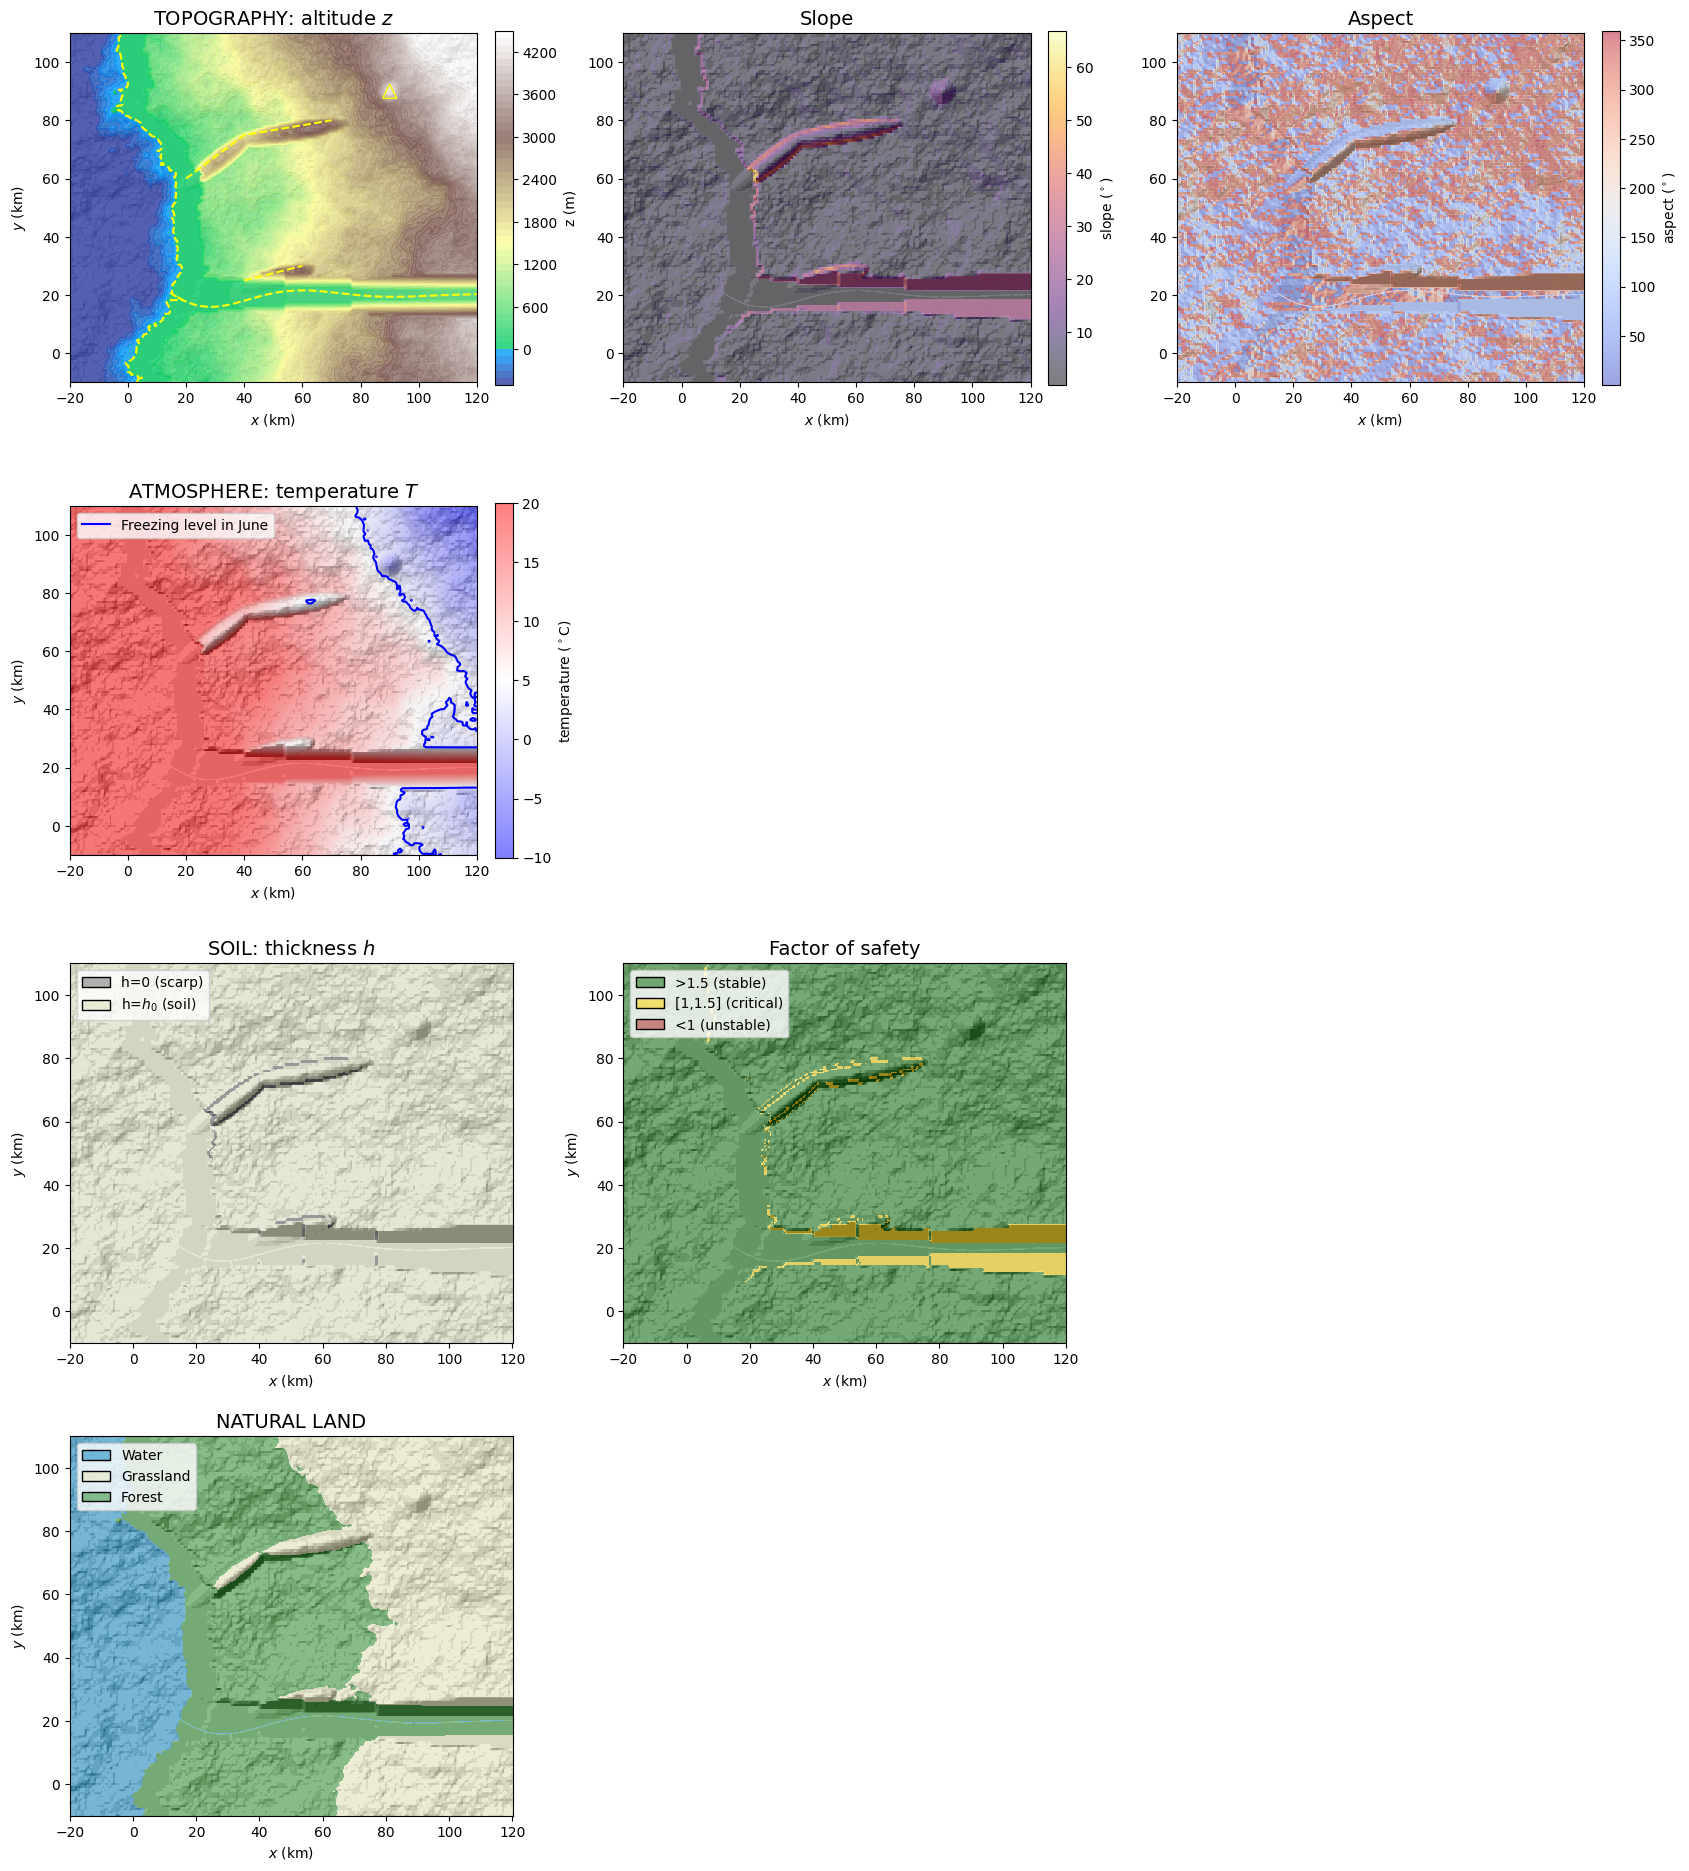

In [7]:
GenMR_env.plot_EnvLayers([topoLayer, atmoLayer, soilLayer, natLandLayer], file_ext = 'jpg')

The function `plot_EnvLayer_attr()` plots individual attributes (incl. properties) from environmental layers. If the elevation is given in the argument `hillshading_z`, hill shading is added in the background.

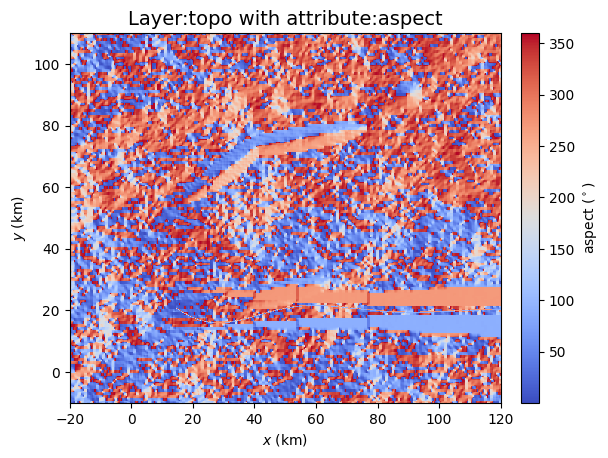

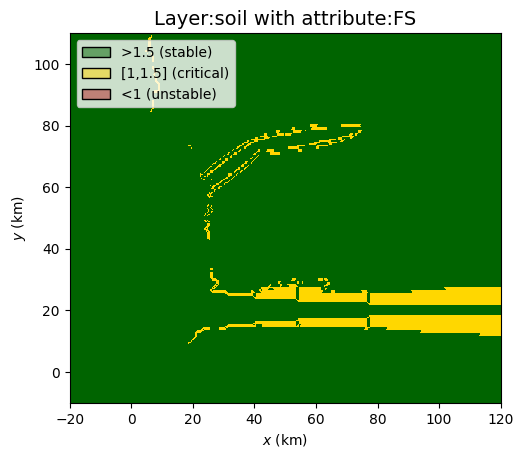

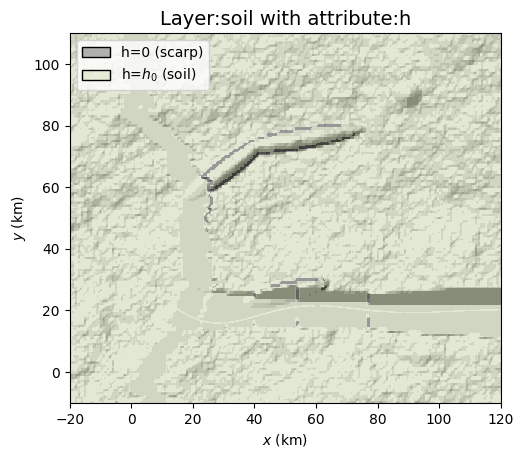

In [9]:
GenMR_env.plot_EnvLayer_attr(topoLayer, 'aspect', file_ext = 'jpg')
GenMR_env.plot_EnvLayer_attr(soilLayer, 'FS')
GenMR_env.plot_EnvLayer_attr(soilLayer, 'h', hillshading_z = topoLayer.z)

## 2. Technological environment generation

The technological system refers to all things produced by humans. This includes the built environment and critical infrastructures (transportation network, energy production and distribution). Goods and services (via businesses) will be defined in the socio-economic system.

### 2.1. Generating the urban land layer (and road network object)

The **urban land layer** (parameterized in `urbLandPar`) updates the natural land layer by urbanising grid pixels with new states $S = 2$ for residential, $S = 3$ for industrial and $S = 4$ for commercial. The city nucleates at `city_seed`$(x,y)$ and grows for a period of `city_yrs` years by following the main rules of the SLEUTH CA (Clarke et al., 1997; Candau et al., 2002; Candau, 2002) parameterized by `SLEUTH_*`. Each year, the city develops constrained on the road network configuration (an environmental object in the digital template) that grows in parallel to the city, and which is also based on a CA (Koenig & Bauriedel, 2009) with parameters `road_*` in the dictionary `urbLandPar`. After each built per simulation-year, built grid pixels get their state $S$ following the land-use transformation function of White et al. (1997:tab.1). The full description of this hybrid city-generator will be given in a future article (Mignan, in prep.; see [Mignan, 2024:boxes 3.1-3.3](https://www.cambridge.org/highereducation/books/introduction-to-catastrophe-risk-modelling/A3A5B5FB990921422BFEBB07734BF869#overview) for a summary).

**On the SLEUTH model:** Please note that the SLEUTH algorithm used for <code>GenMR</code> was developed from the modelling instructions provided in Clarke et al. (1997) and Candau (2002) to gain knowledge on the general process of city growth. It is therefore likely that the code differs in several ways from the official SLEUTH urban growth model. Consider using <code><a href="https://pypi.org/project/sleuth-automation/" target="_blank">sleuth-automation</a></code> for any dedicated SLEUTH model use. The class <code>GenMR.environment.EnvLayer_landUrb()</code> includes a road network CA within the SLEUTH loop and adds the land use transformation function of White et al. (1997) instead of the SLEUTH Deltatron at the end of each year-run.

Depending on the parameterization (especially on the value of `city_yrs`), the city generation may take more than a few minutes! (possibly half an hour for a 100-year built). To expedite the process, the user could directly load the saved default `urbLandLayer` class instance by defining `file_urbLandLayer = 'envLayer_natLand_default.pkl'` below if such file already exists.

For economic loss assessment in the next notebooks, additional attributes are defined per building block, function of the occupancy class. Four generic building materials `bldg_type` are considered: Wood (W), masonry (M), reinforced concrete (RC) and steel (S). Building value `bldg_value` is estimated as a function of GDP per capita (see parameter `GPD_percapita_USD`) following the power-law

$C = c_1 V^{c_2}$

where $C$ is the building construction cost and $V$ the GDP per capita (assuming parity between USD and EUR). Empirical parameters $c_1$ and $c_2$ are obtained from Huizinga et al. (2017). For different occupancy classes, we have:
* Residential: Wood (W) or masonry (M) depending on the ratio `bldg_res_wood2brick`, $c_1 = 24.1$ and $c_2 = 0.385$;
* Commercial: Reinforced concrete (RC), $c_1 = 33.6$ and $c_2 = 0.357$;
* Industrial: Steel (S), $c_1 = 30.8$ and $c_2 = 0.325$.

(*Note on possible future improvement:* adding a modifying factor with distance from city center (or built year) to distinguish the historical centre from more modern areas)

In [12]:
#file_urbLandLayer = ''           # run the city growth model if '' provided
file_urbLandLayer = 'envLayer_urbLand.pkl'

urbLandPar = {
    'lores_f': 10, 'rdm_seed': 4, # seed does not work -> find where to put it...
    'city_seed': [40.5,20.5],     # coordinates of city seed centre (put near river as historical centre)
    'city_yr0': 1900,             # year of settlement creation
    'city_yrs': 100,              # number of years for urban growth from seed
    'SLEUTH_maxslope': 22,        # cannot build above (degree) - Candau & Rasmussen (2000:2)
    'SLEUTH_disp': 10,            # dispersion coefficient
    'SLEUTH_breed': 50,           # breed coefficient
    'SLEUTH_spread': 20,          # spread coefficient
    'SLEUTH_slope': 90,
    'SLEUTH_roadg': 4,            # road gravity
    'road_growth': 2,             # number of road network nodes generated per year
    'road_Rmax': 3,               # max. radius in terms of number of perpendicular cells
    'road_maxslope': 10,          # cannot build above (degree)
    'road_X': 6,                  # 
    'bldg_RES_wood2brick': .6,    # ratio of number of RES. blocks made of wood relative to bricks (masonry)
    'GPD_percapita_USD': 40e3     # GDP per capita (USD) used to estimate construction cost for res, com, ind.
}
GenMR_utils.save_dict2json(urbLandPar, filename = 'par_urbLand')

In [13]:
if len(file_urbLandLayer) != 0:
    urbLandLayer = GenMR_utils.load_pickle2class('/io/' + file_urbLandLayer)
    print('... urbLandLayer class instance loaded')
else:
    urbLandLayer = GenMR_env.EnvLayer_urbLand(natLandLayer, urbLandPar)   # init city instance
    for t in tqdm(range(urbLandPar['city_yrs'])):
        next(urbLandLayer)   
    GenMR_utils.save_class2pickle(urbLandLayer, filename = 'envLayer_urbLand')

100%|█████████████████████████████████████████| 100/100 [39:00<00:00, 23.40s/it]


### 2.2. Environmental layer properties

We will again use the function `plot_EnvLayer()` to display the environmental layer main attributes and other properties. For a `landUrbLayer` class instance, the main attribute is the land-use state $S$. The two properties are the linked road network `roadNet` and the asset value `expo_value`. The asset value will represent the exposure data for risk assessment in the next tutorial. More attributes are actually available (see full list in Table A1) and can be plotted individually by using `plot_EnvLayer_attr()` (e.g., `'built_yr'`, `'industrialZones'`).

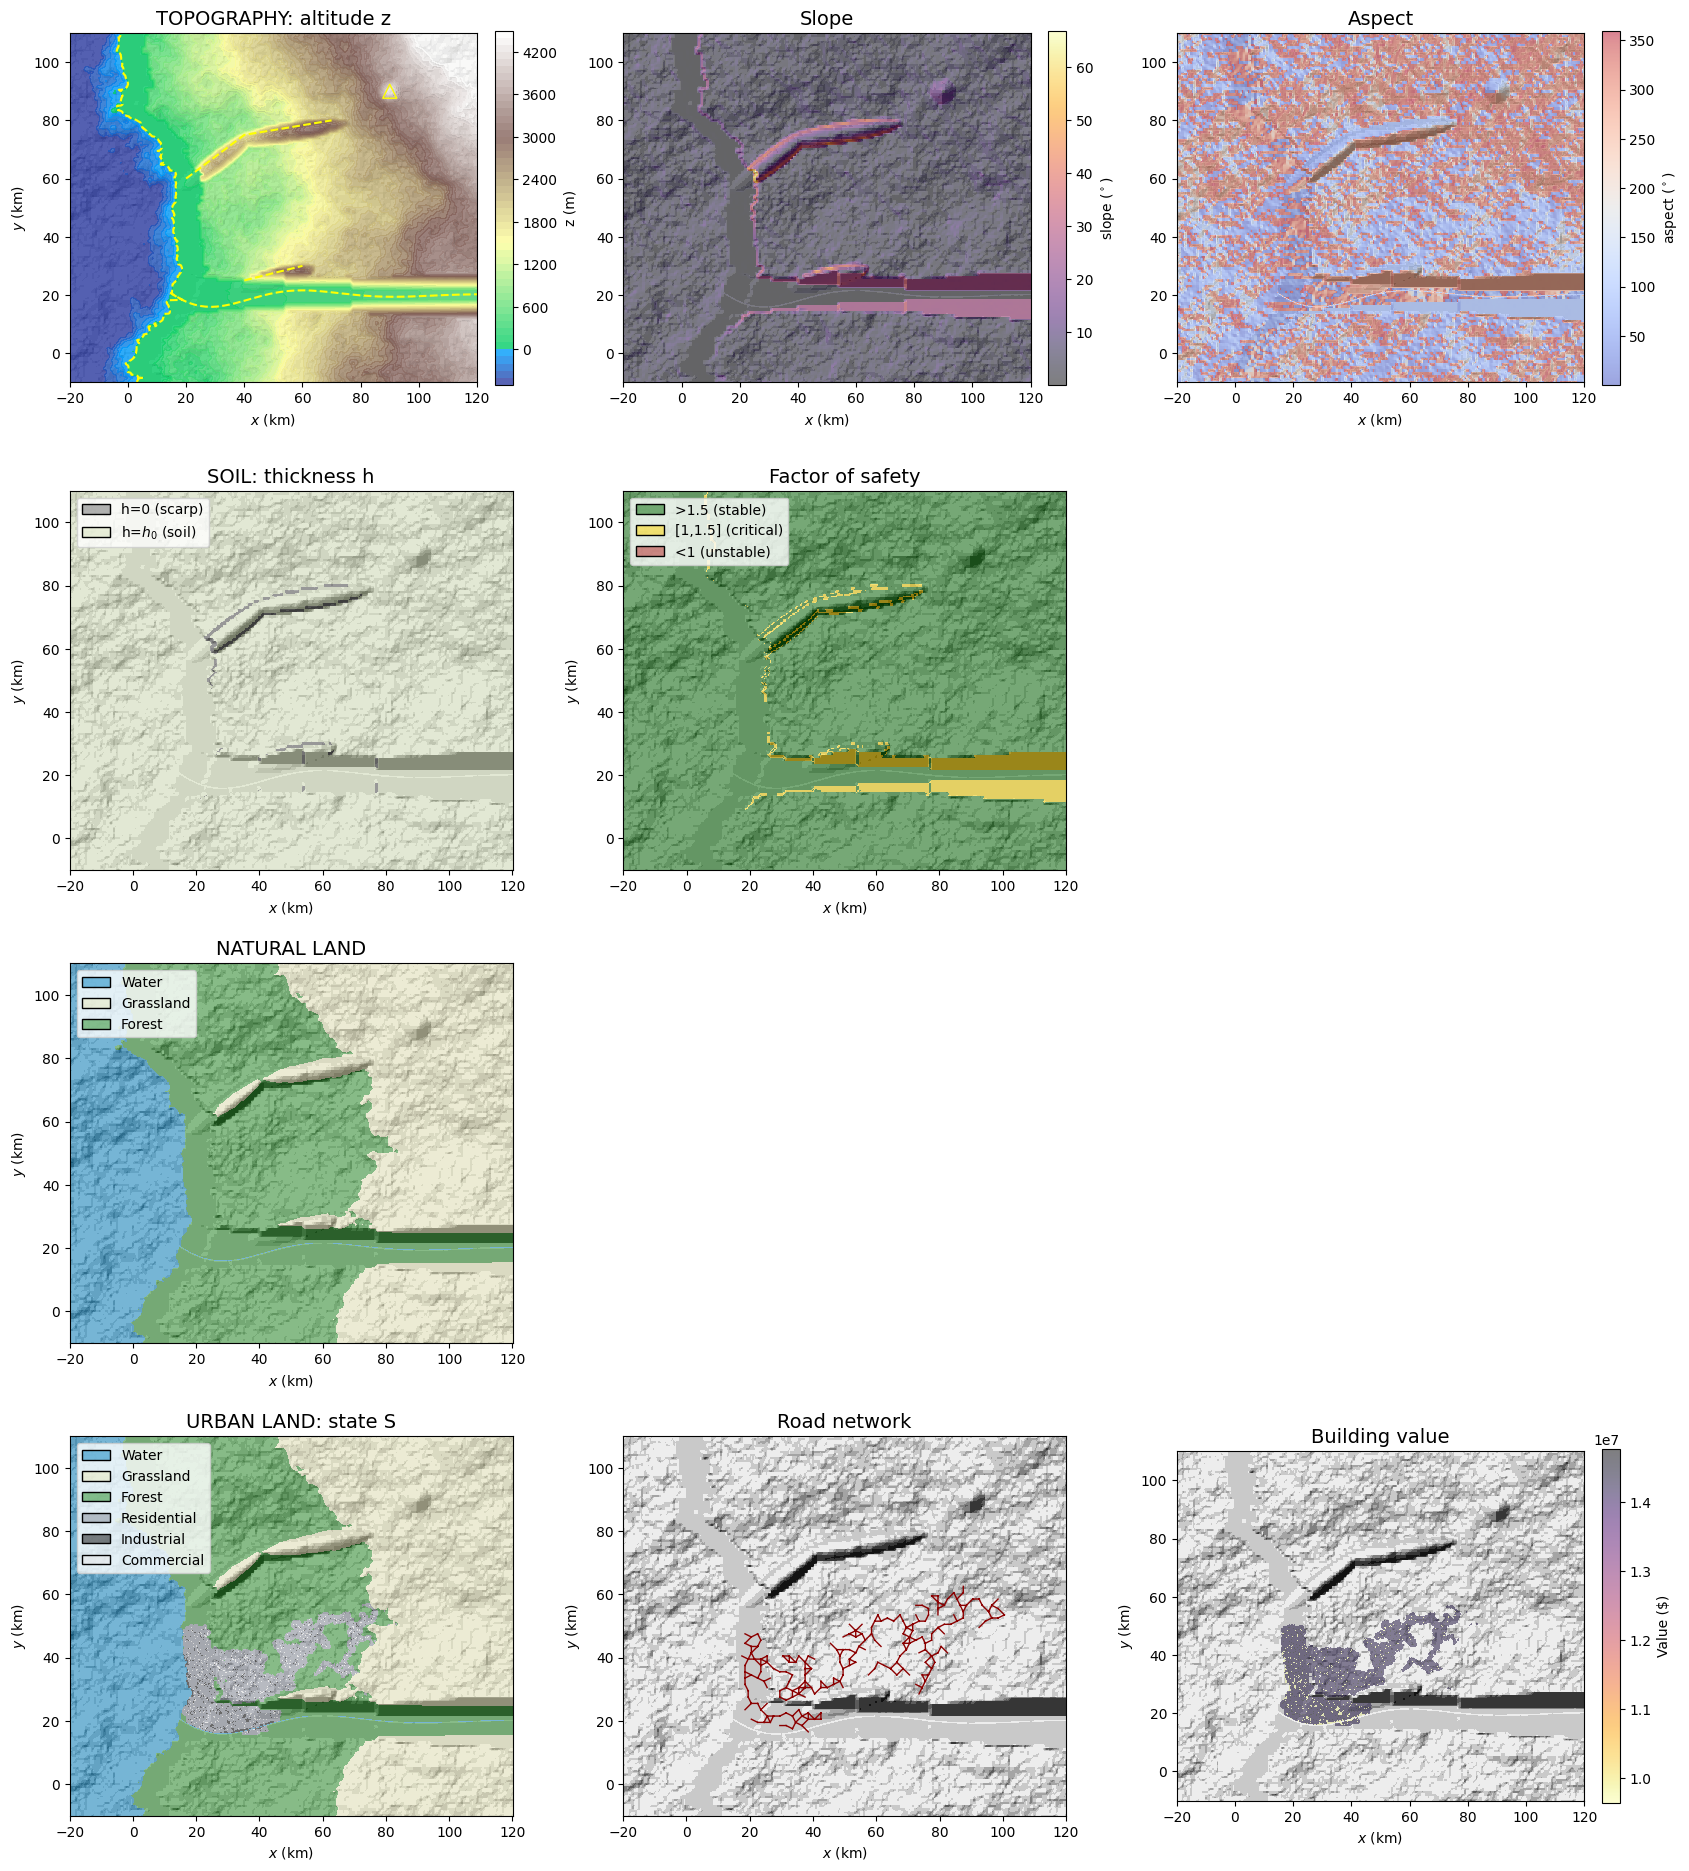

In [14]:
#GenMR_env.plot_EnvLayers([urbLandLayer], file_ext = 'jpg')
GenMR_env.plot_EnvLayers([topoLayer, soilLayer, natLandLayer, urbLandLayer], file_ext = 'jpg')

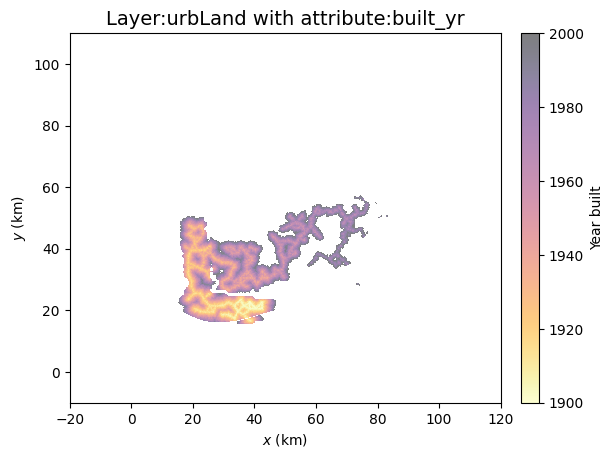

In [15]:
GenMR_env.plot_EnvLayer_attr(urbLandLayer, 'built_yr')

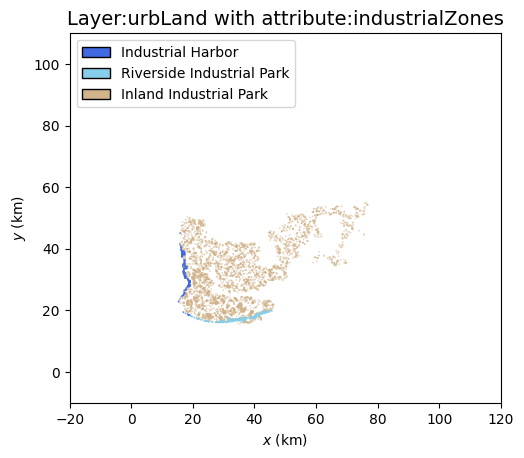

In [16]:
GenMR_env.plot_EnvLayer_attr(urbLandLayer, 'industrialZones')  # slow only the first time it is called

Three types of industrial zones are defined in the virtual city: the industrial harbor, the riverside industrial park, and the inland industrial parks. This classification is used to automatically locate a refinery, identified as a critical infrastructure and a potential source of industrial explosions in Tutorial 2, within the largest industrial harbor sector. This is illustrated below by plotting the coordinates of the attribute `CI_refinery`.

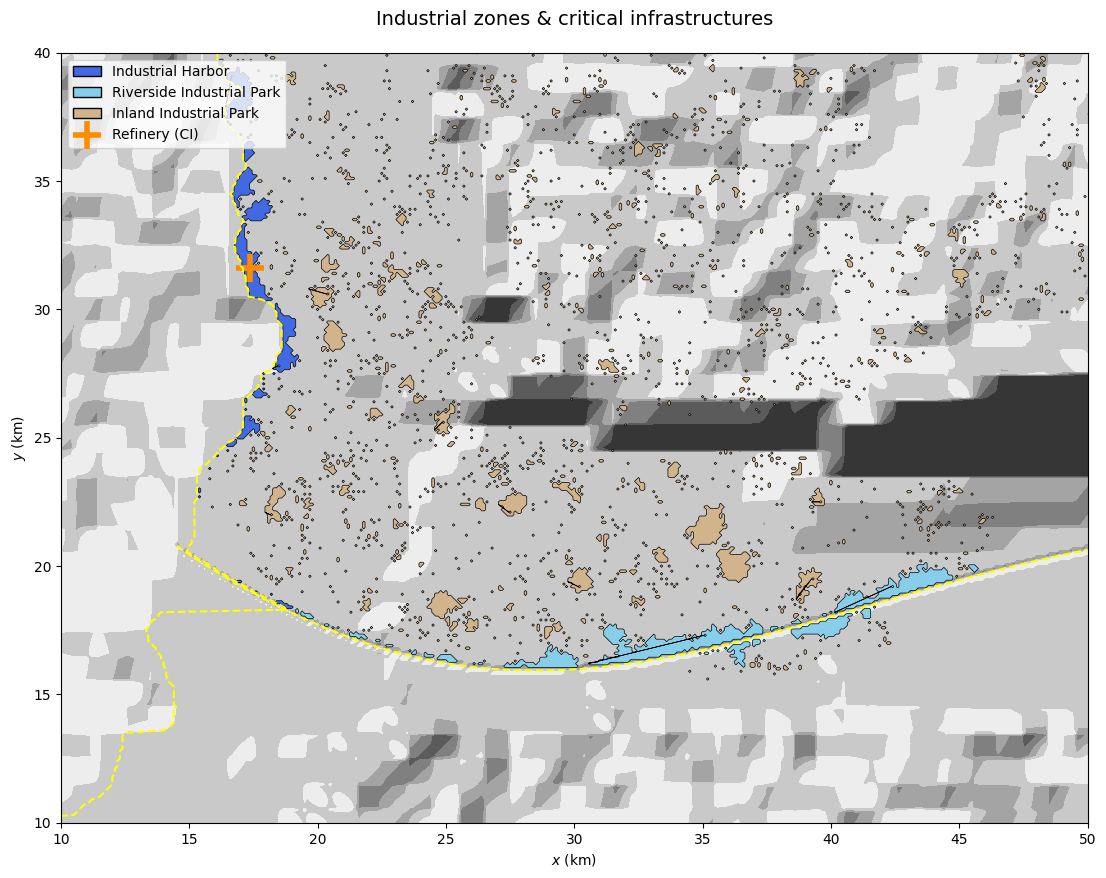

In [17]:
## zoom into city and plot CI_refinery encoded in urbLandLayer (for explosion Ex source in Tutorial 2):
industrialZones = urbLandLayer.industrialZones
CI_refinery = urbLandLayer.CI_refinery


fig, ax = plt.subplots(1,1, figsize=(20,10))

coast_x, coast_y = topoLayer.coastline_coord
riv_x, riv_y, _, _ = topoLayer.river_coord

ax.contourf(grid.xx, grid.yy, GenMR_env.ls.hillshade(topoLayer.z, vert_exag=.1), cmap='gray')
ax.plot(coast_x, coast_y, color = 'yellow', linestyle = 'dashed')
ax.plot(riv_x, riv_y, color = 'yellow', linestyle = 'dashed')
for poly in industrialZones:
    patch = MplPolygon(
            poly['vertices'],
            closed=True,
            facecolor=GenMR_utils.col_industrialZone.get(poly['zone_type'], 'gray'),
            edgecolor='black',
            alpha=1.,
            linewidth=.5
    )
    ax.add_patch(patch)

cx, cy = CI_refinery.centroid
ax.scatter(cx, cy, color = 'darkorange', marker = '+', s = 400, linewidth = 4, label = 'Refinery (CI)')
scatter_handles, scatter_labels = ax.get_legend_handles_labels()

ax.set_xlabel('$x$ (km)')
ax.set_ylabel('$y$ (km)')
ax.set_xlim(10,50)
ax.set_ylim(10,40)
ax.set_title('Industrial zones & critical infrastructures', size = 14, pad = 20)
ax.set_aspect(1)

all_handles = GenMR_env.lgd_industrialZone + scatter_handles
all_labels  = [h.get_label() for h in GenMR_env.lgd_industrialZone] + scatter_labels
ax.legend(all_handles, all_labels, loc='upper left');

In [ ]:
# TO DO for v1.1.2: add economic zones for BI events

## 3. Socio-economic environment generation

TO DO

## References

* Candau JT (2002), Temporal calibration sensitivity of the SLEUTH urban growth model. Master Thesis, University of California Santa Barbara, 130 pp.
* Clarke KC, Hoppen S, Gaydos L (1997), A self-modifying cellular automaton model of historical urbanization in the San Francisco Bay area. Environment and Planning B: Planning and Design, 24, 247-261.
* Huizinga et al. (2017), 
* Koenig R, Bauriedel C (2009), Generating settlement structures: a method for urban planning and analysis supported by cellular automata. Environment and Planning B: Planning and Design, 36, 602-624.
* Mignan A (2022), A Digital Template for the Generic Multi-Risk (GenMR) Framework: A Virtual Natural Environment. International Journal of Environmental Research and Public Health, 19 (23), 16097, doi: 10.3390/ijerph192316097
* Mignan A (2024), Introduction to Catastrophe Risk Modelling - A Physics-based Approach. Cambridge University Press, doi: 10.1017/9781009437370
* Morgan-Wall T (2022), rayshader: Create Maps and Visualize Data in 2D and 3D. https://www.rayshader.com.
* North et al. (1981), Energy Balance Climate Models. Rev. Geophys. Space Phys. 19(1), 91-121.
* White R, Engelen G, Uljee I (1997), The use of constrained cellular automata for high-resolution modelling of urban land-use dynamics. Environment and Planning B: Planning and Design, 24, 323-343.

## Appendix

### A. Attributes & properties of environmental layers

<br>

<center><small><b>Tab. A1.</b> Full list of attributes and properties in environmental layers <code>EnvLayer_ID</code>.</small></center>
<br>

| Layer ID | Attribute | ID | Description |
| :--- | :--- | :--- | :--- |
| `topoLayer` | Elevation | `z` | Main variable (m) |
| `topoLayer` | Object coordinates | `coastline_coord` | Coordinates of the coastline |
| `topoLayer` | Object coordinates | `river_coord` | Coordinates of the river(s) |
| `topoLayer` | Slope | `slope` | Terrain slope ($^\circ$) |
| `topoLayer` | Aspect | `aspect` | Azimuth that the terrain surface faces ($^\circ$) |
| `atmoLayer` | Near-surface air temperature | `T` | Main variable ($^\circ$C) |
| `atmoLayer` | |  |  |
| `atmoLayer` | |  |  |
| `EnvLayer_soil` | Soil thickness | `h` | Main variable (m) |
| `EnvLayer_soil` | Water column | `hw` | Water height in soil (m) |
| `EnvLayer_soil` | Factor of safety value | `FS_value` | Describes the stability level of the soil |
| `EnvLayer_soil` | Factor of safety state | `FS_state` | stable ($=0$), critical ($=1$), unstable ($=2$)|
| `EnvLayer_soil` | Wetness | `wetness` | Ratio between `hw` and `h` |
| `EnvLayer_natLand` | Land class | `S` | Main variable, water ($=-1$), grassland ($=0$), forest ($=1$) |
| `EnvLayer_natLand` | Water column | `hW` | Water level above soil (in river) |
| `EnvLayer_urbLand` | Occupancy class | `S` | Main varable, residential ($=2$), industrial ($=3$), commercial ($=4$) |
| `EnvLayer_urbLand` | Built year | `built_yr` | Year in which the city block has been built |
| `EnvLayer_urbLand` | Object coordinates | `roadNet_coord` | Coordinates of the road network |
| `EnvLayer_urbLand` | Building type | `bldg_type` | Wood (`W`), masonry (`M`), reinforced concrete (`RC`), steel (`S`) |
| `EnvLayer_urbLand` | Building roof pitch | `bldg_roofpitch` | Low (`L`), medium (`M`), high (`H`) |
| `EnvLayer_urbLand` | Building value | `bldg_value` | Construction cost (currency unit) |
| `EnvLayer_urbLand` | Industrial zone type | `industrialZones` | Harbor, riverside, inland |
| `EnvLayer_urbLand` | Refinery | `CI_refinery` | Refinery coordinates |
| | | | |


#### A.1 A note on environmental layer downscaling

Different environmental processes may occur at different scales. The default resolution is defined by the pixel width `gridPar['w']`, which represents the finest one possible for environmental layers. A grid class instance can be downscaled with the function `downscale_RasterGrid()`. This was for example used to generate the topography (in `EnvLayer_topo()`). Another process defined at lower resolution will be the road network in Section 2 which will required downscaled terrain slope and water mask as inputs. Different pooling methods (minimum, mean or maximum) are available in function `pooling()`. This is illustrated below with the resolution reduced by a factor `f = 50` to emphasize the impact on the layers.

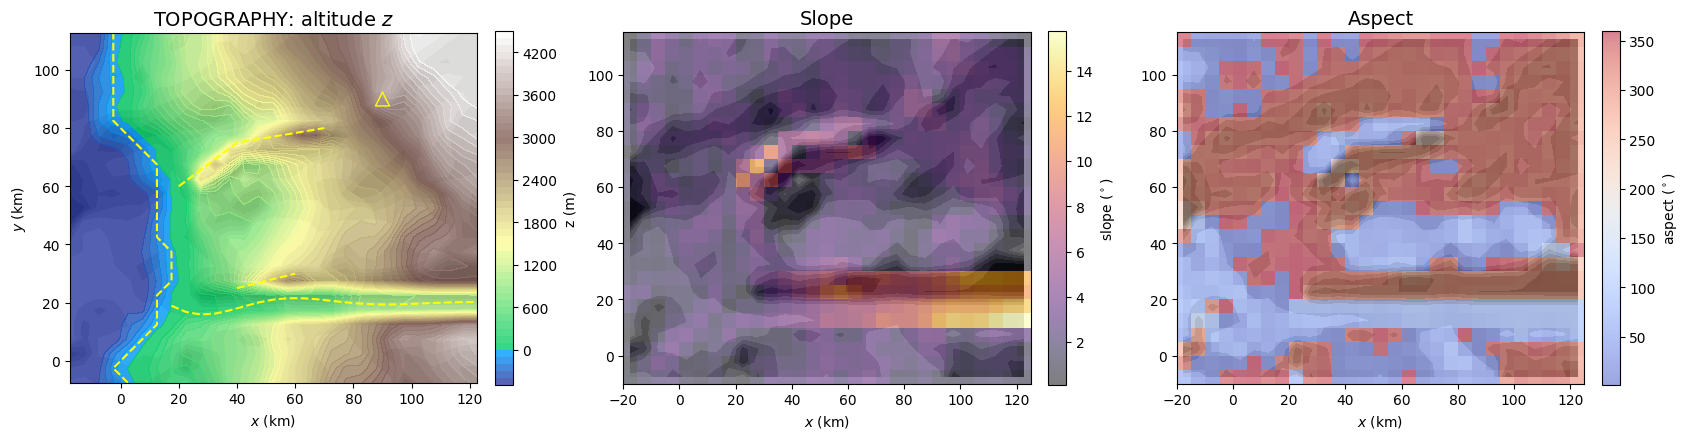

In [10]:
f = 50
grid_downscaled = GenMR_env.downscale_RasterGrid(grid, f, appl = 'pooling')
topoLayer_downscaled = copy.deepcopy(topoLayer)
topoLayer_downscaled.grid = grid_downscaled
topoLayer_downscaled.z = GenMR_utils.pooling(topoLayer.z, f, method = 'mean')             # mean-pooling example

GenMR_env.plot_EnvLayers([topoLayer_downscaled])    # notice that properties are automatically recomputed

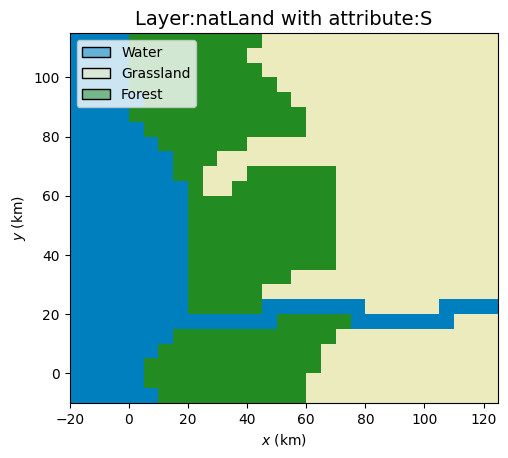

In [11]:
natLandLayer_downscaled = copy.deepcopy(natLandLayer)
natLandLayer_downscaled.grid = grid_downscaled
natLandLayer_downscaled.S = GenMR_utils.pooling(natLandLayer.S, f, method = 'min')        # min-pooling example

GenMR_env.plot_EnvLayer_attr(natLandLayer_downscaled, 'S')

### B. Underlying physical processes

IN CONSTRUCTION

#### B.1. Atmospheric layer: Temperature

The reference near-surface air temperature `T0` is calculated using the Energy Balance Climate Model (EBCM) of North et al. (1981). The next cell shows how `T0` depends on the latitude of the digital template and the month considered (see future Tutorial 3 for the implementation of seasonality in CAT modelling).

Global mean surface temperature (GMST): 14.763157894736834°C
Average zonal temperature = 14.76365750942746°C (= GMST, validation value)


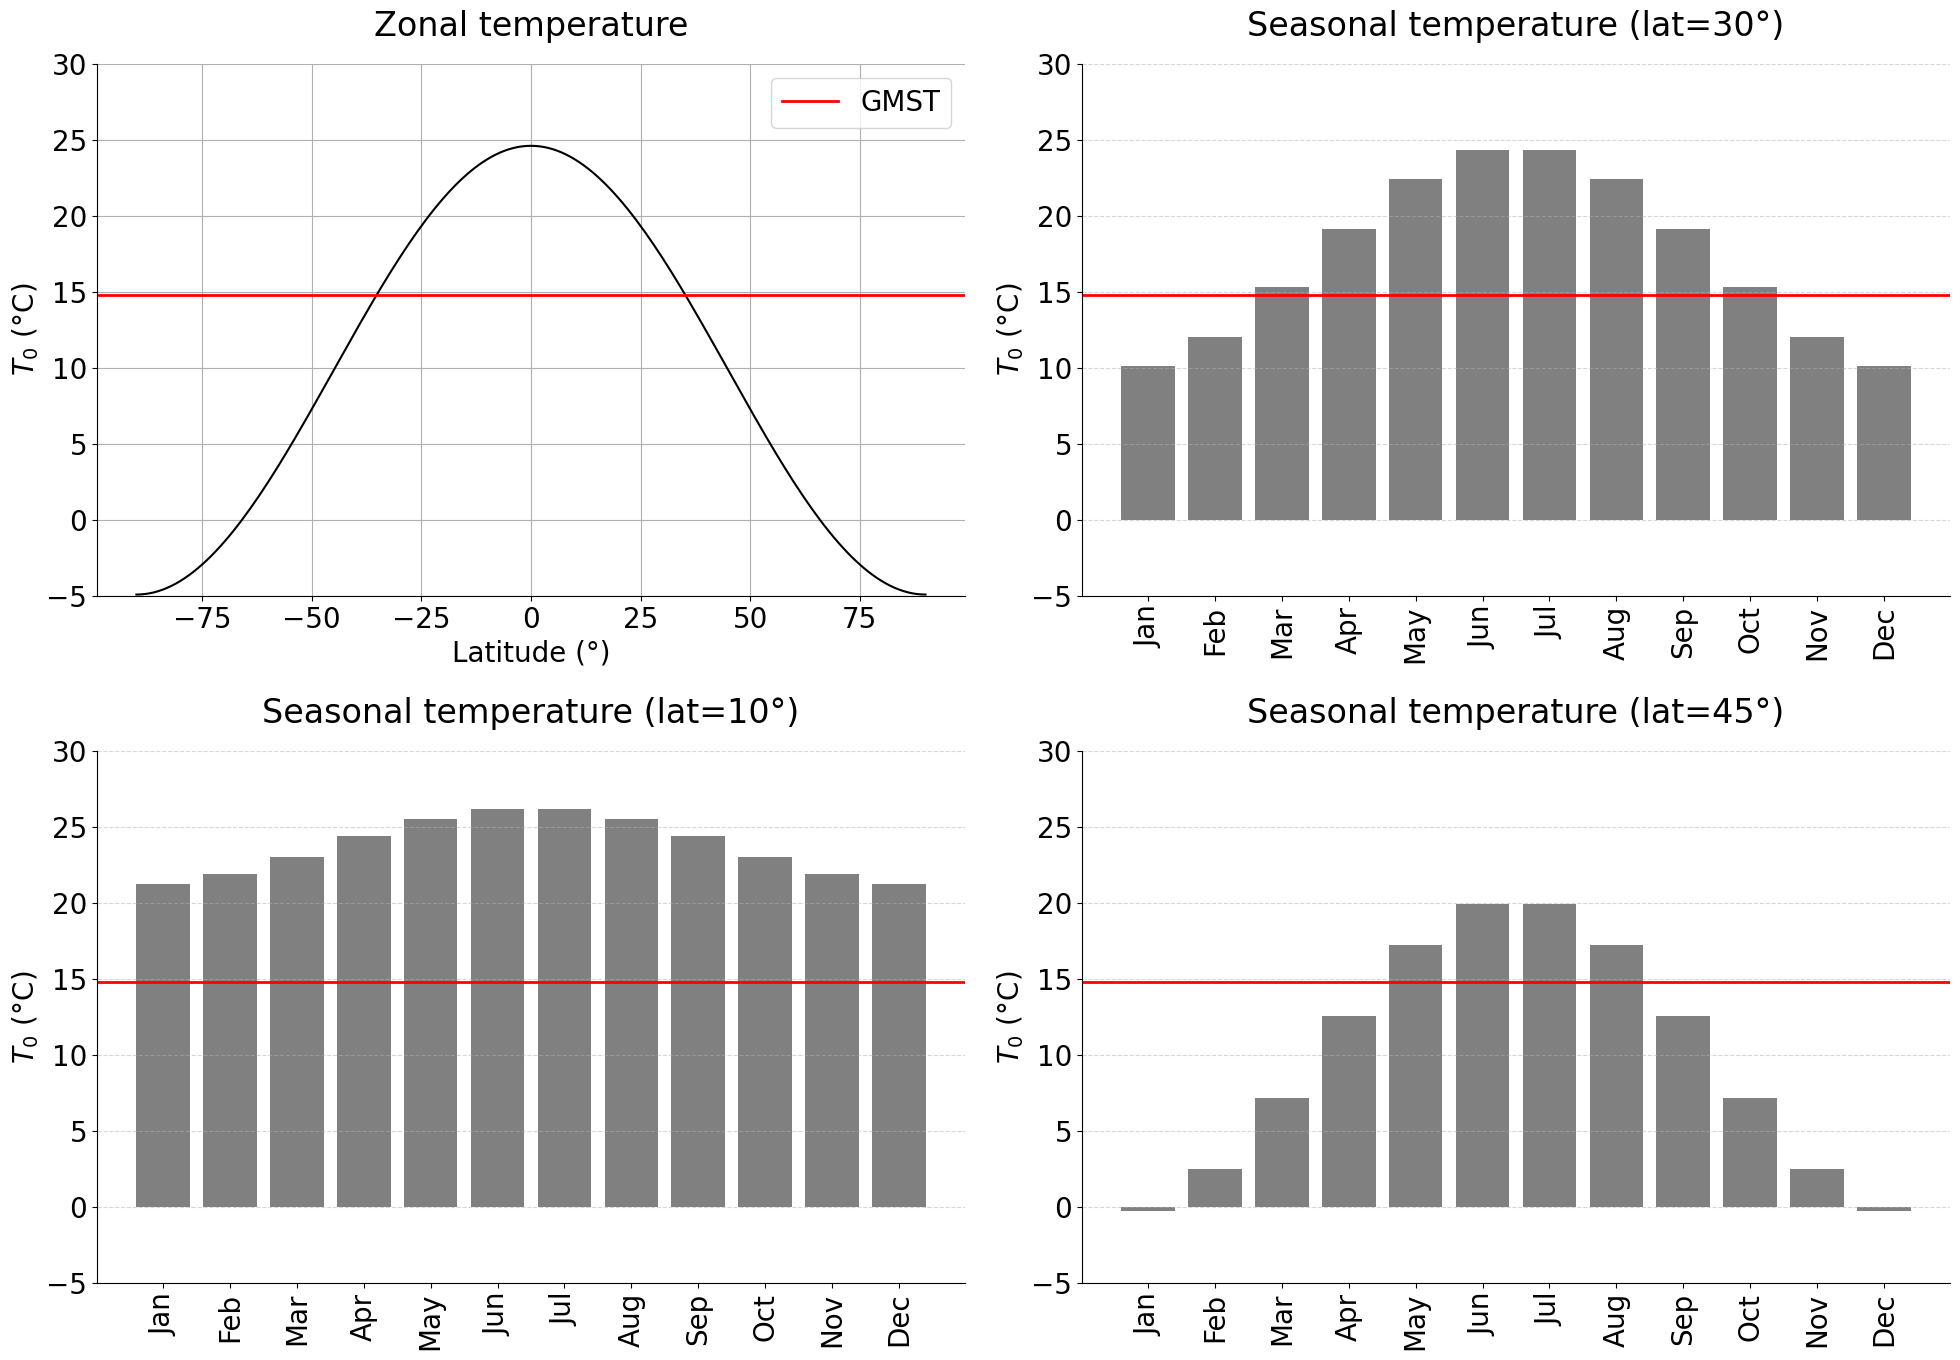

In [22]:
lat_low, lat_med, lat_hig = 10, 30, 45
lati = np.arange(-90,91)
moni = np.arange(12)+1

_, T0_zonal, GMST = GenMR_env.EnvLayer_atmo.calc_T0_EBCM(lati, np.nan)
print(f'Global mean surface temperature (GMST): {GMST}°C')
GMST_from_zonal = np.average(T0_zonal, weights = np.cos(np.radians(lati)))
print(f'Average zonal temperature = {GMST_from_zonal}°C (= GMST, validation value)')

T0_low, _, _ = GenMR_env.EnvLayer_atmo.calc_T0_EBCM(lat_low, moni)
T0_med, _, _ = GenMR_env.EnvLayer_atmo.calc_T0_EBCM(lat_med, moni)
T0_hig, _, _ = GenMR_env.EnvLayer_atmo.calc_T0_EBCM(lat_hig, moni)

plt.rcParams['font.size'] = '20'
fig, ax = plt.subplots(2,2, figsize = (20,14))
Tmin, Tmax = -5., 30.

ax[0,0].plot(lati, T0_zonal, color = 'black')
ax[0,0].axhline(GMST, color = 'red', linewidth = 2, label = 'GMST')
ax[0,0].set_xlabel('Latitude (°)')
ax[0,0].set_ylabel('$T_0$ (°C)')
ax[0,0].set_title('Zonal temperature', pad = 20)
ax[0,0].grid()
ax[0,0].legend()
ax[0,0].set_ylim(Tmin, Tmax)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)

ax[0,1].bar(moni, T0_med, color='grey')
ax[0,1].axhline(GMST, color = 'red', linewidth = 2)
ax[0,1].set_xticks(moni, GenMR_utils.month_labels_short, rotation=90)
ax[0,1].set_ylabel('$T_0$ (°C)')
ax[0,1].set_title(f'Seasonal temperature (lat={lat_med}°)', pad = 20)
ax[0,1].grid(axis='y', linestyle='dashed', alpha=.5)
ax[0,1].set_ylim(Tmin, Tmax)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)

ax[1,0].bar(moni, T0_low, color='grey')
ax[1,0].axhline(GMST, color = 'red', linewidth = 2)
ax[1,0].set_xticks(moni, GenMR_utils.month_labels_short, rotation=90)
ax[1,0].set_ylabel('$T_0$ (°C)')
ax[1,0].set_title(f'Seasonal temperature (lat={lat_low}°)', pad = 20)
ax[1,0].grid(axis='y', linestyle='dashed', alpha=.5)
ax[1,0].set_ylim(Tmin, Tmax)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)

ax[1,1].bar(moni, T0_hig, color='grey')
ax[1,1].axhline(GMST, color = 'red', linewidth = 2)
ax[1,1].set_xticks(moni, GenMR_utils.month_labels_short, rotation=90)
ax[1,1].set_ylabel('$T_0$ (°C)')
ax[1,1].set_title(f'Seasonal temperature (lat={lat_hig}°)', pad = 20)
ax[1,1].grid(axis='y', linestyle='dashed', alpha=.5)
ax[1,1].set_ylim(Tmin, Tmax)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)

fig.tight_layout();